## Random variables (25/09)

In [40]:
# imports
from scipy.stats import norm, t, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import pandas as pd
#settings
sns.set_theme(style="whitegrid")

### Gaussian random variable

In [24]:
r = norm.rvs(size=1000) #random variable sample
print(r)

[ 1.33866141e-01  4.36115781e-02  1.18680059e+00 -1.32678097e+00
  1.35839566e+00  3.45846135e-01  1.00939828e+00 -1.31062179e-01
  7.52972056e-01  2.17103382e-01  8.01348387e-01 -2.97691515e-01
  7.36060199e-01  7.64908364e-02 -3.13369672e-01 -2.20928851e-01
  6.79726644e-01 -6.02512270e-01 -3.36745640e-01 -1.15237912e+00
 -5.21130139e-01  1.60512372e-01  1.05433958e-01 -3.19805247e-02
  1.30088785e+00 -7.56387097e-01 -8.04076827e-02  1.17889185e+00
 -1.54527332e+00 -4.58077335e-01 -1.88803545e-01  1.23043558e+00
 -5.49530130e-01  7.40880887e-01  1.56002610e-01  1.05001141e+00
  6.89119328e-01 -7.77539451e-02  1.53675015e+00  1.85130561e+00
  1.44095471e+00  8.72027781e-01 -1.90037576e+00 -3.27560314e-01
 -8.15979745e-01  5.08839531e-01 -5.94029122e-01 -2.46564850e-01
 -1.46813036e+00  3.50592270e-02  8.69038532e-02 -5.54984321e-03
 -5.33955721e-01  1.08769840e-01 -9.05599646e-01  6.63390398e-01
 -8.81777315e-02 -7.96951503e-01  7.84111950e-01  5.80844576e-01
 -1.03081082e+00  1.40746

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


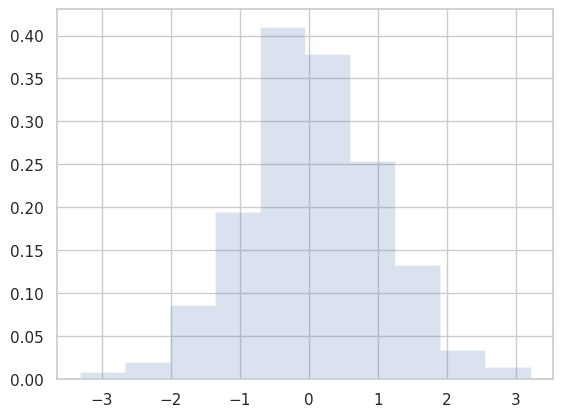

In [25]:
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled',alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

### Quantiles

In [29]:
valnorm = norm.ppf([0.05, 0.5, 0.95]) 
valt = t.ppf([0.1, 0.5, 0.9], 50)
valchi2 = chi2.ppf([0.001, 0.5, 0.999], 10)

print(valnorm) 
print(valt)
print(valchi2)

[-1.64485363  0.          1.64485363]
[-1.29871369e+00  6.67126076e-17  1.29871369e+00]
[ 1.47874346  9.34181777 29.58829845]


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


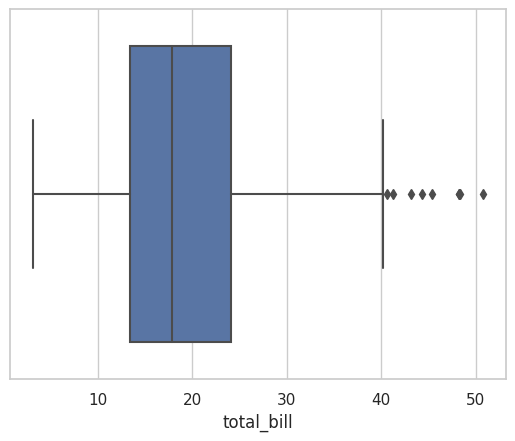

In [30]:

tips = sns.load_dataset("tips")
print(tips)

ax = sns.boxplot(x=tips["total_bill"])

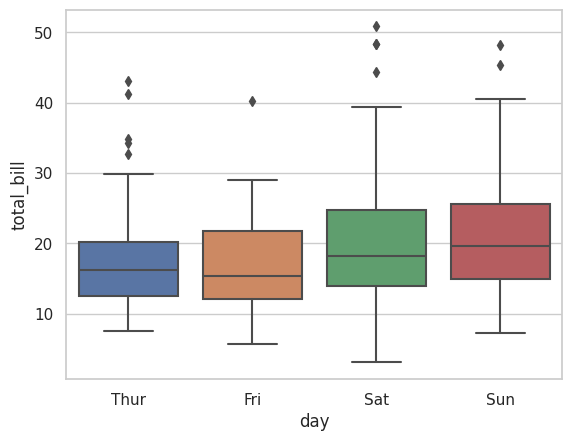

In [31]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

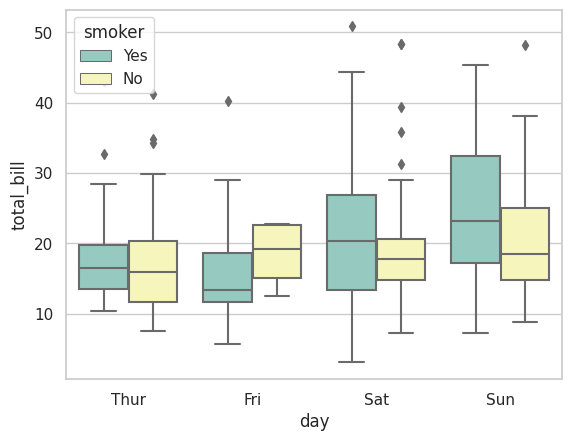

In [32]:
ax = sns.boxplot(x="day", y="total_bill",hue="smoker", data=tips, palette="Set3")

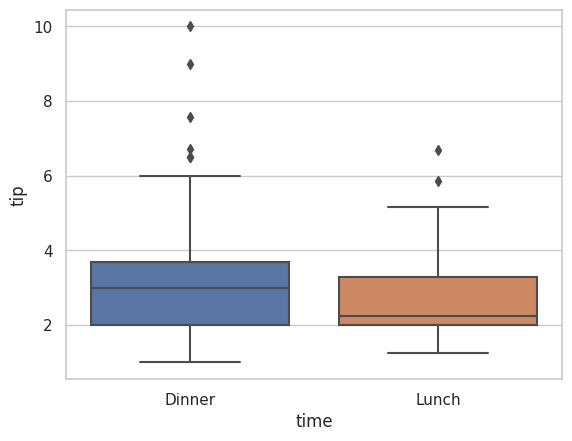

In [33]:
ax = sns.boxplot(x="time", y="tip", data=tips,order=["Dinner", "Lunch"])

### Quantile-quantile plots

L'allure de ce diagramme (par rapport à la droite identité) permet de comparer deux séries. Par exemple, comparaison de la richesse/pauvreté dans deux pays: si les quantiles sont éloignés alors il existe des différences significatives entre la richesse dans un pays ou dans l'autre.

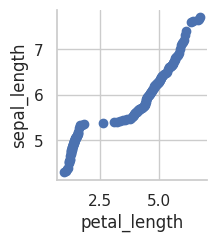

In [38]:
iris = sns.load_dataset('iris')
pplot(iris, x = "petal_length", y = "sepal_length",kind = 'qq')

### Correlation

/tmp/ipykernel_1310/1148832405.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix=iris.corr()


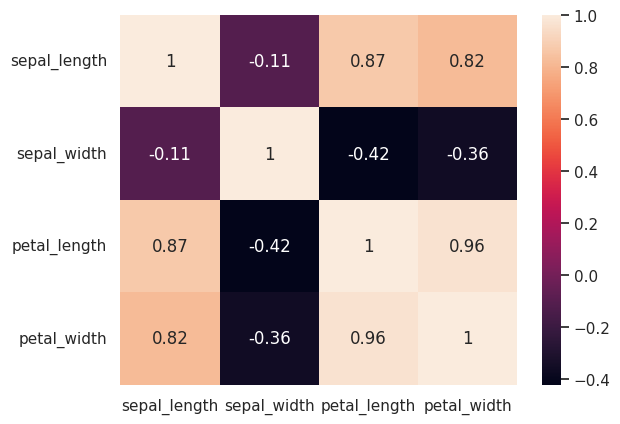

In [41]:
path="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(path,header=None)
iris.columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
iris.dropna(how="all", inplace=True)
iris.head()

corrMatrix=iris.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()